In [151]:
import astropy
from astropy.io import fits
from astropy.table import Table
import matplotlib.pylab as plt
import numpy as np
import scipy.interpolate
from scipy.interpolate import splev, splrep

In [ ]:
%pwd

In [228]:
%matplotlib inline
from astropy.io import fits

#This is data for Tau Ceti
#ESPRESSO
taudata = fits.open('ADP.2021-04-13T13:26:21.329.fits')
taudata.info()
image_data = taudata[0].data # Get the data associated with the HDU, same as for a table
print(taudata[1].columns)

evt_data = Table(taudata[1].data)
print(evt_data)
print(evt_data['WAVE'].data)

Filename: ADP.2021-04-13T13:26:21.329.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1677   ()      
  1  SPECTRUM      1 BinTableHDU     86   1R x 12C   [443262D, 443262D, 443262D, 443262J, 443262D, 443262D, 443262D, 443262D, 443262J, 443262D, 443262D, 443262J]   
ColDefs(
    name = 'WAVE'; format = '443262D'; unit = 'angstrom'
    name = 'FLUX'; format = '443262D'; unit = 'erg.cm**(-2).s**(-1).angstrom**(-1)'
    name = 'ERR'; format = '443262D'; unit = 'erg.cm**(-2).s**(-1).angstrom**(-1)'
    name = 'QUAL'; format = '443262J'
    name = 'SNR'; format = '443262D'
    name = 'WAVE_AIR'; format = '443262D'; unit = 'angstrom'
    name = 'FLUX_EL'; format = '443262D'
    name = 'ERR_EL'; format = '443262D'
    name = 'QUAL_EL'; format = '443262J'
    name = 'FLUX_CAL'; format = '443262D'; unit = 'erg.s**(-1).cm**(-2)*angstrom**(-1)'
    name = 'ERR_CAL'; format = '443262D'; unit = 'erg.s**(-1).cm**(-2)*angstrom**(-1)'
    name = 'Q

Text(0.5, 1.0, 'Tau Ceti')

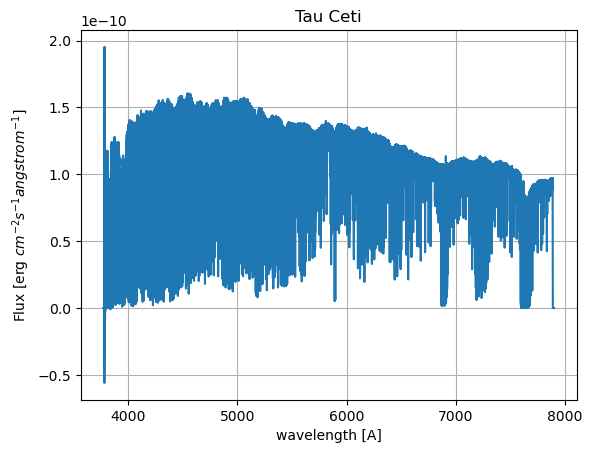

In [229]:
#This is for all of data plotted
plt.plot(evt_data['WAVE'][0][:],evt_data['FLUX'][0][:])
# plt.xlim(5880,5899)
plt.grid()
plt.xlabel('wavelength [A]')
plt.ylabel('Flux [erg $cm^{-2}$$s^{-1}$$angstrom^{-1}$]')
plt.title('Tau Ceti')

Text(0.5, 1.0, 'Not Normolized Sodium D Spectral Lines ')

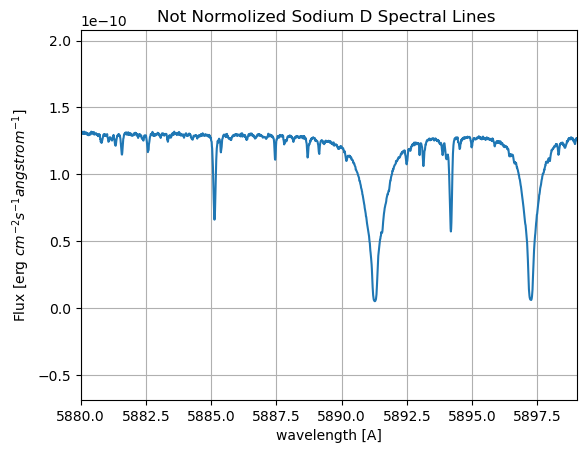

In [230]:
plt.plot(evt_data['WAVE'][0][:],evt_data['FLUX'][0][:])
plt.xlim(5880,5899)
plt.grid()
plt.xlabel('wavelength [A]')
plt.ylabel('Flux [erg $cm^{-2}$$s^{-1}$$angstrom^{-1}$]')
plt.title('Not Normolized Sodium D Spectral Lines ')

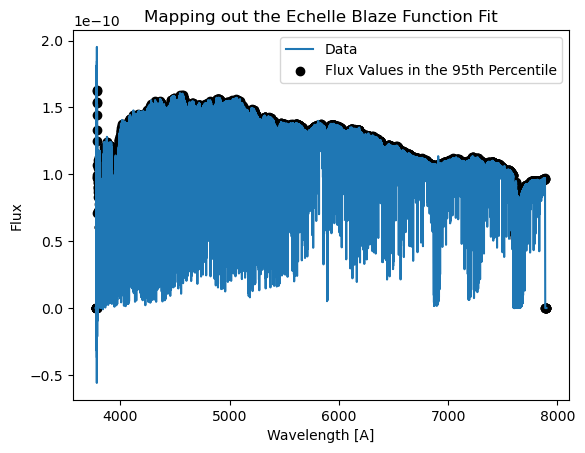

In [231]:
#This is for all data
bin = 100
wave = evt_data['WAVE'][0][:]
flux = evt_data['FLUX'][0][:]
# this list will contain the indices corresponding to each of the 95th percentile flux values in each bin
indices = []

for i in np.arange((len(wave) - (bin)), step = bin):
    flux_values = []
    for j in np.arange(i, i + bin, step = 1):
        value = flux[j]
        flux_values = np.append(flux_values, value)
    # find the 95th percentile flux value: we use 95 to get the maximum flux value in general 
    # but avoid issues with cosmic rays and other emission lines
    flux_in_bin = np.percentile(flux_values, 95)
    # find the closest value in the flux array to the 95th percentile value
    absolute_difference_function = lambda list_value : abs(list_value - flux_in_bin)
    flux_in_bin = min(flux_values.tolist(), key=absolute_difference_function)
    index_in_bin = flux_values.tolist().index(flux_in_bin)
    index = i + index_in_bin
    indices = np.append(indices, index)

# these lists will contain the wavlength and flux values at each index in 'indices'
wl_values = []
fl_values = []

for index in indices:
    ind = int(index)
    wl_values = np.append(wl_values, wave[ind])
    fl_values = np.append(fl_values, flux[ind])
    
plt.plot(wave, flux, label = 'Data')
plt.scatter(wl_values, fl_values, color = 'black', label = 'Flux Values in the 95th Percentile')
# plt.xlim(5880,5899)
plt.title('Mapping out the Echelle Blaze Function Fit')
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.legend()
plt.show()

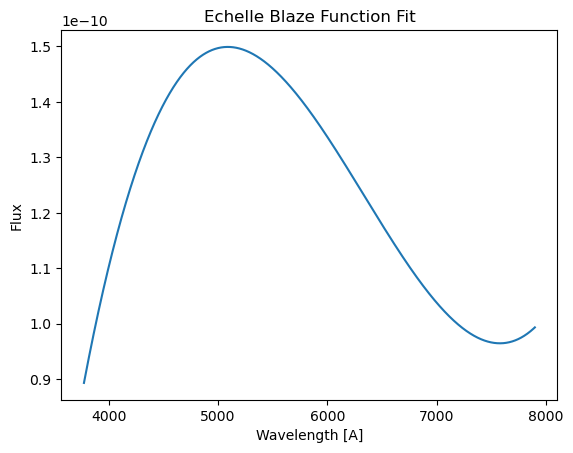

In [232]:
spl = splrep(wl_values, fl_values, s = 500000)
flux_fit = splev(wave, spl)
plt.plot(wave, flux_fit)
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.title('Echelle Blaze Function Fit')
plt.show()

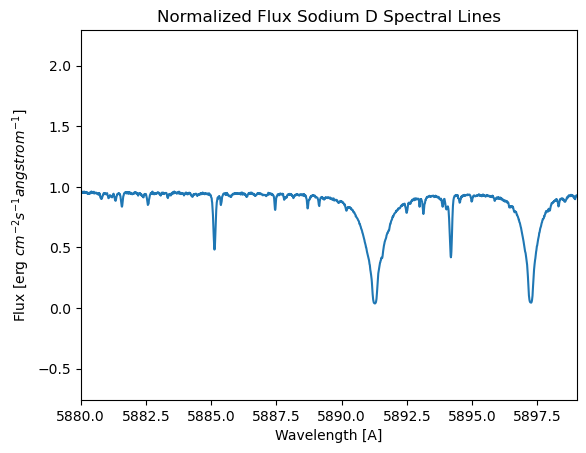

In [233]:
#This is for Sodium D Spectral Lines
first_normalized_flux = flux / flux_fit
plt.xlim(5880,5899)
plt.plot(wave, first_normalized_flux)
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux [erg $cm^{-2}$$s^{-1}$$angstrom^{-1}$]')
plt.title('Normalized Flux Sodium D Spectral Lines')
plt.show()

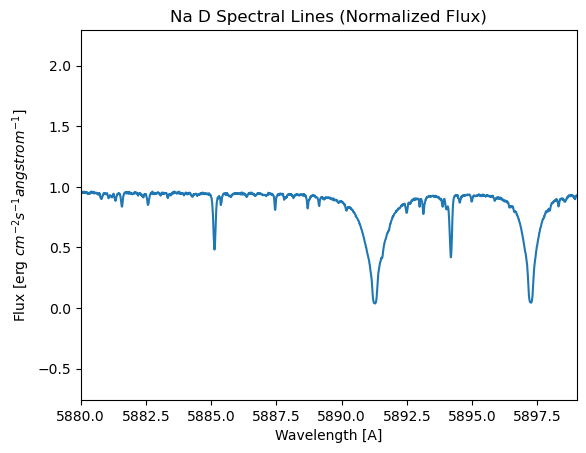

In [236]:
#Defining a function which can give us other elements in the spectrum of a star, based on the wavelength
#of that element

def element_spectra(wave, normalized_flux, start_xlim, end_xlim ):
    first_normalized_flux = flux / flux_fit
    plt.xlim(start_xlim,end_xlim)
    plt.plot(wave, first_normalized_flux)
    plt.xlabel('Wavelength [A]')
    plt.ylabel('Flux [erg $cm^{-2}$$s^{-1}$$angstrom^{-1}$]')
    plt.show()
    
    
    
plt.title("Na D Spectral Lines (Normalized Flux)")
element_spectra(wave, flux, 5880, 5899)

In [235]:
print(evt_data)
print(evt_data['WAVE'].data)

                  WAVE                     FLUX       ERR     ...  ERR_CAL      QUAL_CAL   
--------------------------------------- ---------- ---------- ... ---------- --------------
3772.0027440048325 .. 7899.979099406373 0.0 .. 0.0 0.0 .. 0.0 ... 0.0 .. 0.0 16384 .. 16384
[[3772.002744   3772.00903481 3772.01532563 ... 7899.95274887
  7899.96592413 7899.97909941]]


In [11]:
evt_data['FLUX']

0.0 .. 0.0


(1, 443262)
[5887.89558922 5887.90540884 5887.91522847 ... 7899.95274887 7899.96592413
 7899.97909941]
[1.25869403e-10 1.25843543e-10 1.27251718e-10 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


Text(0.5, 1.0, 'Tau Ceti')

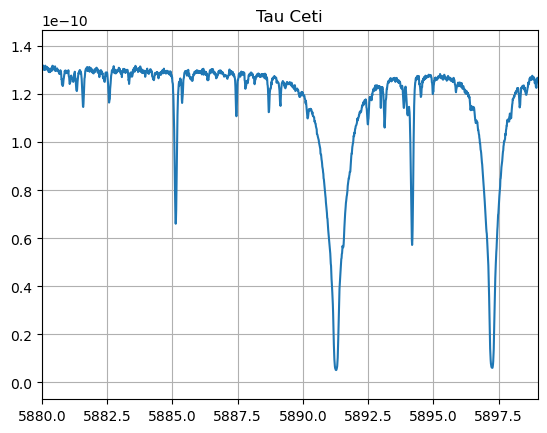

In [145]:
#reference for selected specific sections of the data 
plt.plot(evt_data['WAVE'][0][246000:2680000],evt_data['FLUX'][0][246000:2680000])
print(evt_data['FLUX'].shape)
print(evt_data['WAVE'][0][267000:2680000])
print(evt_data['FLUX'][0][267000:2680000])
# print(evt_data['FLUX'][0][::1100])
plt.xlim(5880,5899)
# plt.axvline(x=5890, linestyle='-', color ='r')
# plt.axvline(x=5896, linestyle='-', color ='r')
plt.grid()
flux = evt_data['FLUX'].data
wave = evt_data['WAVE'].data
# plt.xlabel('wavelength [Angs]')
# plt.ylabel('Flux [arbitrary units]')
plt.title('Tau Ceti')
# print(flux.shape)
# print(wave.shape)